In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_path="D:\AICTE internship\dataset\TRAIN"
test_path="D:\AICTE internship\dataset\TEST"

In [5]:
#Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
# Load and preprocess the training data
x_data, y_data = [], []  # Lists to store image data and labels

In [7]:
for category in glob(train_path+'/*'):
     for file in tqdm(glob(category+'/*')): 
        img = cv2.imread(file) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_data.append(img) 
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [02:46<00:00, 60.21it/s]


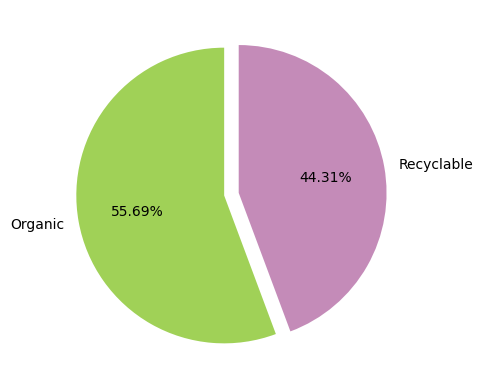

In [8]:
#Visualization
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors,startangle=90, explode=[0.05,0.05])
plt.show()

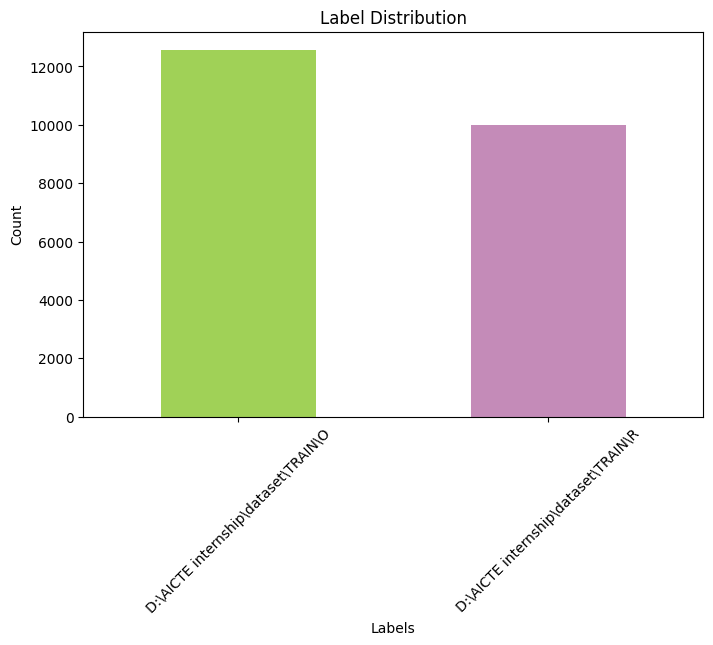

In [9]:
# Visualize the distribution of labels using a bar chart
plt.figure(figsize=(8, 5))  # Set figure size
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title("Label Distribution")  # Add title
plt.xlabel("Labels")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

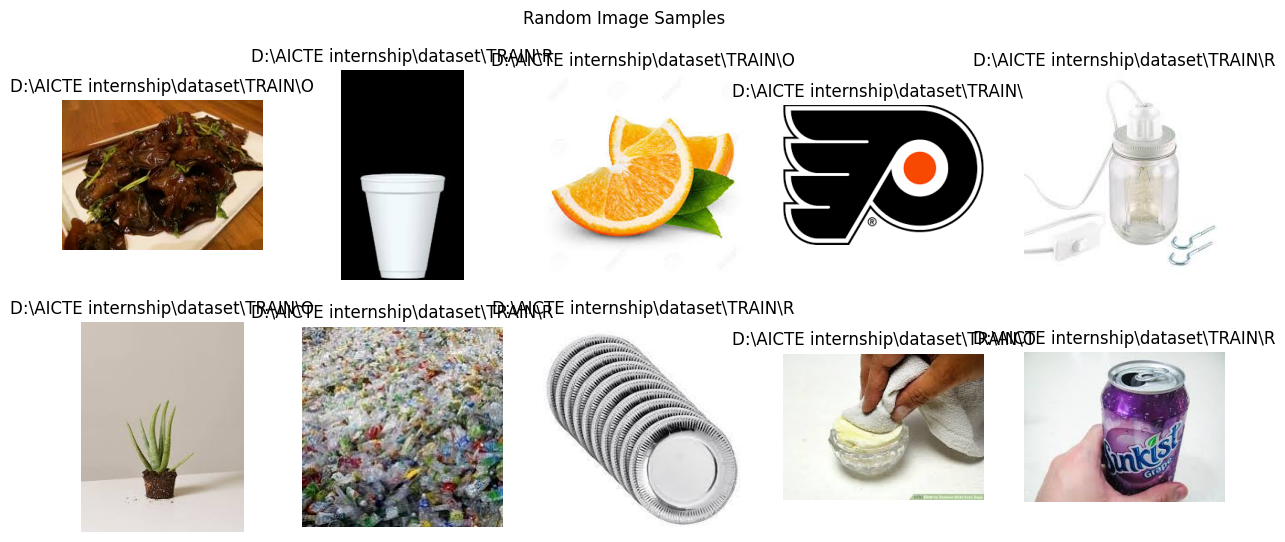

In [10]:
# Display a few random image samples from the dataset with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    random_idx = np.random.randint(len(data))
    ax.imshow(data.iloc[random_idx].image)
    ax.set_title(data.iloc[random_idx].label)
    ax.axis('off')  # Remove axis for better visualization
plt.suptitle("Random Image Samples")  # Add a title for the entire figure
plt.show()

WEEK 2 TASK UPDATION:-


I used the MobileNetV2 architecture. The goal is to classify waste images into two categories efficiently and accurately. To achieve this, I leveraged transfer learning by using MobileNetV2, a pre-trained model on the ImageNet dataset, as the base model. This approach allows the model to benefit from pre-learned features, significantly reducing training time and computational resources. Custom layers, including a global average pooling layer, a dense layer with ReLU and softmax activation, and a dropout layer for regularization, were added on top of the base model to fine-tune it for the specific task of waste classification. The model was compiled using the Nadam optimizer and categorical cross-entropy loss, with accuracy as the evaluation metric.

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [37]:
# Constants
IMG_SIZE = 128  # Image size used for training
BATCH_SIZE = 32


In [38]:
# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model initially


In [ ]:
# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # For Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()  


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 256)               327936    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2586434 (9.87 MB)
Trainable params: 3284

In [ ]:

train_path = "D:\\AICTE internship\\dataset\\TRAIN"
test_path = "D:\\AICTE internship\\dataset\\TEST"


In [41]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation/testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=7, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,  
    validation_data=test_generator,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/15
706/706 [==============================] - 642s 904ms/step - loss: 0.3288 - accuracy: 0.8619 - val_loss: 0.2934 - val_accuracy: 0.8607
Epoch 2/15
706/706 [==============================] - 215s 305ms/step - loss: 0.2300 - accuracy: 0.9106 - val_loss: 0.2323 - val_accuracy: 0.9073
Epoch 3/15
706/706 [==============================] - 213s 302ms/step - loss: 0.2127 - accuracy: 0.9164 - val_loss: 0.2554 - val_accuracy: 0.8846
Epoch 4/15
706/706 [==============================] - 214s 304ms/step - loss: 0.1995 - accuracy: 0.9209 - val_loss: 0.2519 - val_accuracy: 0.8866
Epoch 5/15
706/706 [==============================] - 201s 285ms/step - loss: 0.1860 - accuracy: 0.9281 - val_loss: 0.2492 - val_accuracy: 0.8942
Epoch 6/15
706/706 [==============================] - 203s 287ms/step - loss: 0.1794 - accuracy: 0.9293 - val_loss: 0.2812 - val_accuracy: 0.8762
Epoch 7/15
706/706 [==============================] - 201s 285ms/step - loss: 0.1721 - accuracy: 0.9337 - val_loss: 0.2409 -

In [ ]:
# Unfreeze the last 10 layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again with fine-tuning
history_fine = model.fit(
    train_generator,
    epochs=15,  
    validation_data=test_generator,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/15
706/706 [==============================] - 233s 325ms/step - loss: 0.2514 - accuracy: 0.9018 - val_loss: 0.2168 - val_accuracy: 0.9152
Epoch 2/15
706/706 [==============================] - 227s 321ms/step - loss: 0.2244 - accuracy: 0.9126 - val_loss: 0.2133 - val_accuracy: 0.9196
Epoch 3/15
706/706 [==============================] - 228s 322ms/step - loss: 0.2192 - accuracy: 0.9134 - val_loss: 0.2224 - val_accuracy: 0.9101
Epoch 4/15
706/706 [==============================] - 234s 331ms/step - loss: 0.2082 - accuracy: 0.9176 - val_loss: 0.2280 - val_accuracy: 0.9073
Epoch 5/15
706/706 [==============================] - 219s 311ms/step - loss: 0.2013 - accuracy: 0.9206 - val_loss: 0.2262 - val_accuracy: 0.9081
Epoch 6/15
706/706 [==============================] - 223s 316ms/step - loss: 0.1927 - accuracy: 0.9249 - val_loss: 0.2404 - val_accuracy: 0.9017
Epoch 7/15
706/706 [==============================] - 223s 316ms/step - loss: 0.1880 - accuracy: 0.9264 - val_loss: 0.2202 -

In [ ]:
# Evaluation after fine-tuning
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(test_generator)

print(f"Training Accuracy after Fine-Tuning: {train_accuracy:.2f}")
print(f"Validation Accuracy after Fine-Tuning: {val_accuracy:.2f}")


79/79 [==============================] - 16s 206ms/step - loss: 0.2133 - accuracy: 0.9196
Training Accuracy after Fine-Tuning: 0.93
Validation Accuracy after Fine-Tuning: 0.92


WEEK 3 TASK UPDATION:

In Week 3, I trained the model and obtained some good values in visualization. However, the model's predictions were not very accurate. To improve this, I fine-tuned the model by unfreezing the last 10 layers of the MobileNetV2 base model and re-training it with a lower learning rate (1e-5). This helped the model learn more specific features related to waste classification while retaining its pre-trained knowledge. As a result, I achieved significantly better prediction accuracy.

After fine-tuning, I developed a Streamlit web app to provide a simple user interface for interacting with the model and making predictions easily. The web app allows users to upload an image and classify it as Recyclable or Non-Recyclable Waste with improved accuracy.

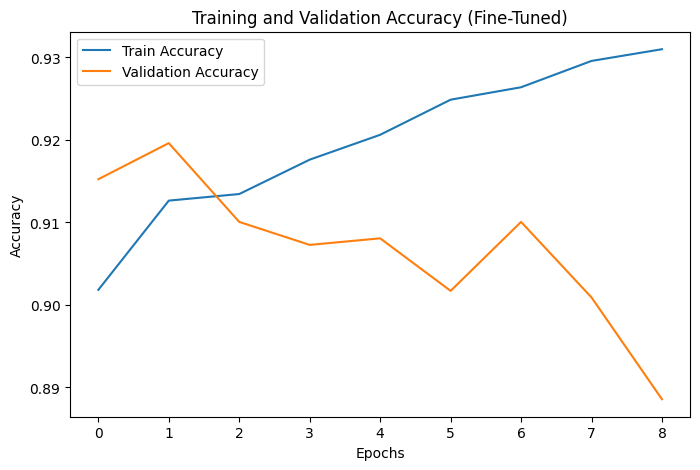

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Fine-Tuned)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [46]:
print(train_generator.class_indices)


{'O': 0, 'R': 1}


In [86]:
def predict_fun(img_path):
    img = cv2.imread(img_path)  # Read image
    img = cv2.resize(img, (128, 128))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.reshape(img, [1, 128, 128, 3])  # Ensure correct shape

    prediction = model.predict(img)
    result = np.argmax(prediction)  # Get the predicted class

    # Map predictions to labels 
    class_labels = {0: "Organic Waste", 1: "Non-Recyclable Waste"}
    
    print(f'The image shown is {class_labels[result]}')


In [87]:
# Provide the image path
image_path = "D:\\AICTE internship\\dataset\\TEST\\R\\R_11106.jpg"

# Predict
predict_fun(image_path)


1/1 [==============================] - 0s 334ms/step
The image shown is Non-Recyclable Waste


Save the Model 

In [59]:
model.save("model.h5")


Creating a user interface by using the streamlit for prediction.

In [60]:
!pip install streamlit tensorflow opencv-python numpy pillow



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image


In [62]:
MODEL_PATH = "model.h5"
model = load_model(MODEL_PATH)


In [63]:
# Constants
IMG_SIZE = 128  # Should match training input size

# Function to preprocess image
def preprocess_image(image):
    image = np.array(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to match model input
    image = image / 255.0  # Normalize
    image = np.reshape(image, (1, IMG_SIZE, IMG_SIZE, 3))  # Reshape for model
    return image


In [82]:
# Function to make predictions
def predict_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    class_index = np.argmax(prediction)  # Get class with highest probability
    class_labels = {0: "Organic Waste", 1: "Non-Recyclable Waste"}
    return class_labels[class_index], prediction


Saving the code in the form of app.py to ensure that it should be in ipynb file

In [83]:
code = """ 
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
MODEL_PATH = "model.h5"
model = load_model(MODEL_PATH)

# Constants
IMG_SIZE = 128

# Preprocess image
def preprocess_image(image):
    image = np.array(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    image = np.reshape(image, (1, IMG_SIZE, IMG_SIZE, 3))
    return image

# Predict function
def predict_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    class_index = np.argmax(prediction)
    class_labels = {0: "Organic Waste", 1: "Non-Recyclable Waste"}
    return class_labels[class_index], prediction

# Streamlit UI
st.title("♻️ Waste Classification App")
st.write("Upload an image to classify it as **Organic** or **Non-Recyclable Waste**.")

# Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    st.write("Processing image...")

    # Predict
    label, confidence = predict_image(image)

    # Display results
    st.write(f"### 🏷️ Prediction: {label}")
    st.write(f"### 🔥 Confidence: {np.max(confidence) * 100:.2f}%")

    # Confidence bar
    st.progress(int(np.max(confidence) * 100))
"""



In [84]:
# Save the Streamlit code to app.py with UTF-8 encoding
with open("app.py", "w", encoding="utf-8") as file:
    file.write(code)

print("✅ Streamlit app code saved as 'app.py'.")


✅ Streamlit app code saved as 'app.py'.


To run the app we should use this command in the cell

In [85]:
!streamlit run app.py

^C
